In [1]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def load_images(directory):
    one_dim = []
    class_names = []
    labels = []
    for filename in os.listdir(directory):
        path = directory + "/" + filename
        t = filename.split('_')
        t = t[0]
        if t not in class_names:
            class_names.append(t)
        labels.append(t)
        im = mpimg.imread(path)
        temp = []
        for row in im:
            for w in row:
                temp.append(int(w))
        one_dim.append(temp)

    return one_dim, labels

In [3]:
trainData , trainlabels = load_images(r"D:\HomeWork\Pattern\SPR_HW3\inputs\P6\LFW\train")

testDataFrame , labels = load_images(r"D:\HomeWork\Pattern\SPR_HW3\inputs\P6\LFW\test")

In [4]:
############################Start of Question A

In [5]:
def eigenfaces_train(trainset , v):
    pca = PCA(n_components= v)
    pca.fit(trainset)
    W = pca.components_
    mu = pca.mean_
    return W , mu

In [6]:
my_array = np.array(trainData)

W , mu = eigenfaces_train(my_array , 50)

In [7]:
W

array([[-0.00138083, -0.00134906, -0.00125912, ..., -0.00172793,
        -0.00061151,  0.00038524],
       [-0.01928103, -0.01893857, -0.01873177, ...,  0.02095828,
         0.01985348,  0.01970132],
       [-0.03397314, -0.03562961, -0.03759151, ...,  0.00615953,
         0.00410838,  0.00364982],
       ...,
       [ 0.01201161,  0.00757613,  0.00074077, ..., -0.01050003,
        -0.00833349, -0.00624069],
       [-0.00909816, -0.00990075, -0.01292049, ..., -0.00113579,
         0.00683955,  0.00836723],
       [ 0.00584393,  0.00951381,  0.01275497, ...,  0.02052509,
         0.02169536,  0.02380995]])

In [8]:
W.shape

(50, 4800)

In [9]:
mu

array([118.67844093, 123.20584653, 128.1498173 , ..., 106.45310597,
       104.70280146, 103.17539586])

In [10]:
mu.shape

(4800,)

In [11]:
############################End of Question A

In [12]:
############################Start of Question B

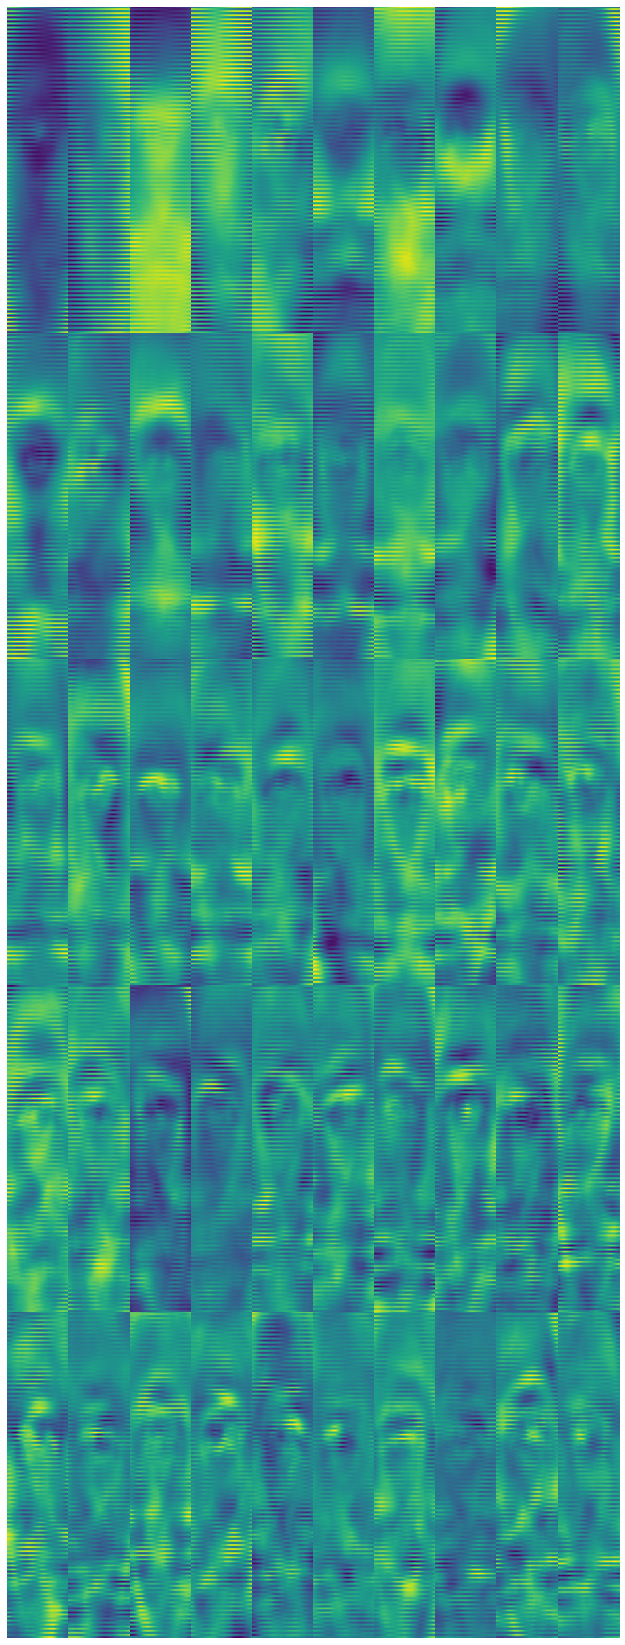

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(30, 30))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 10),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

for ax, im in zip(grid, W):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.reshape(160 , 30))
    ax.axis('off')
plt.show()

In [14]:
############################End of Question B

In [15]:
############################Start of Question C

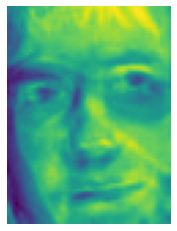

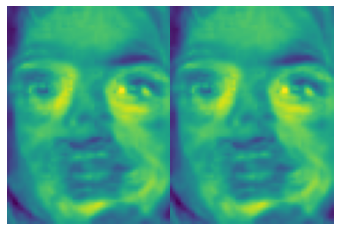

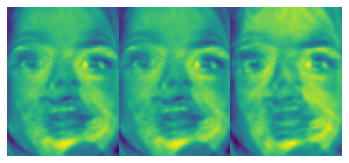

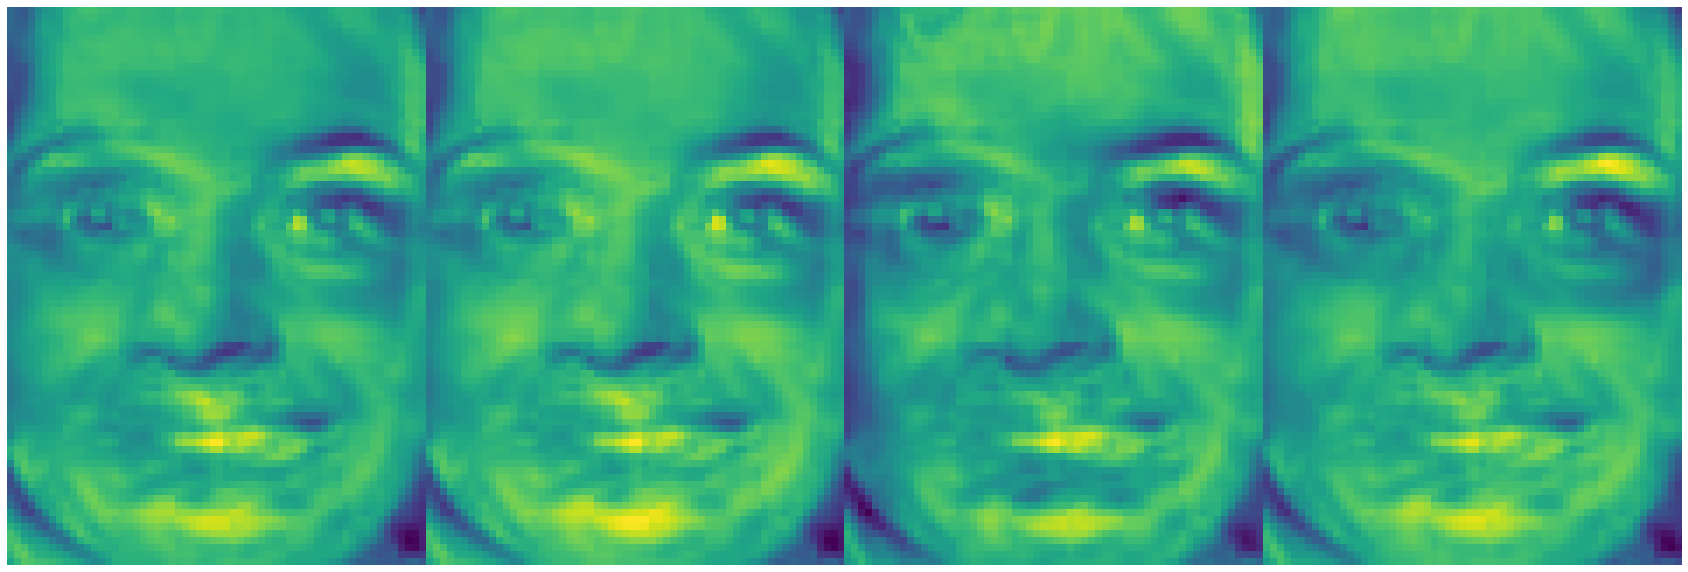

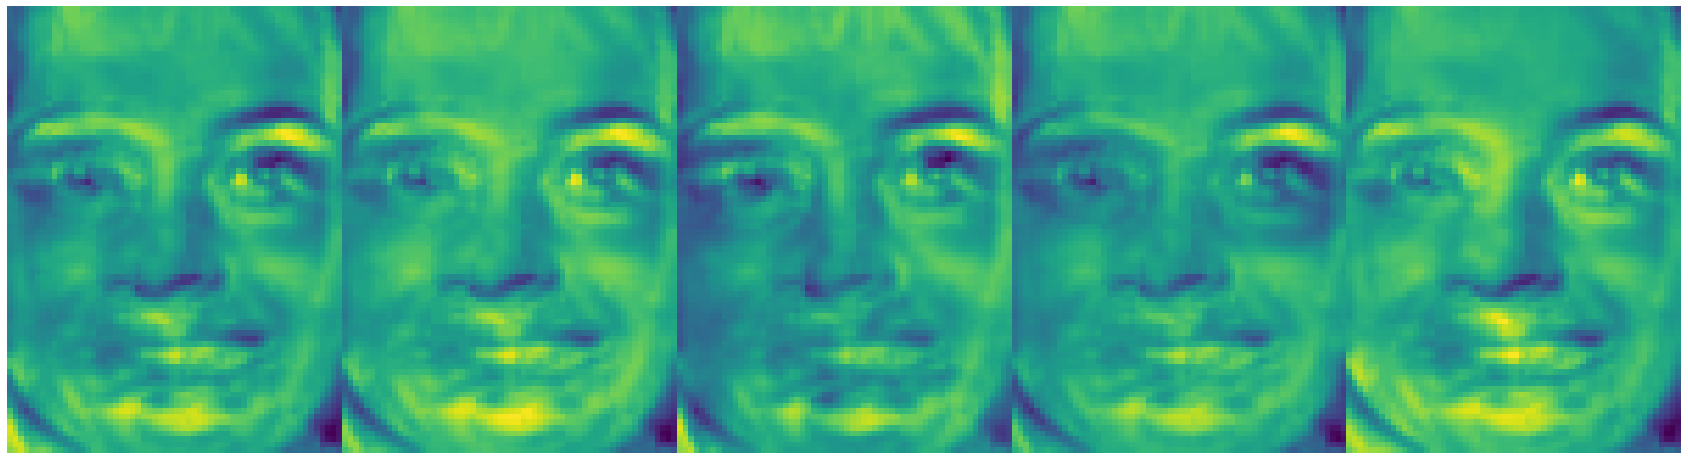

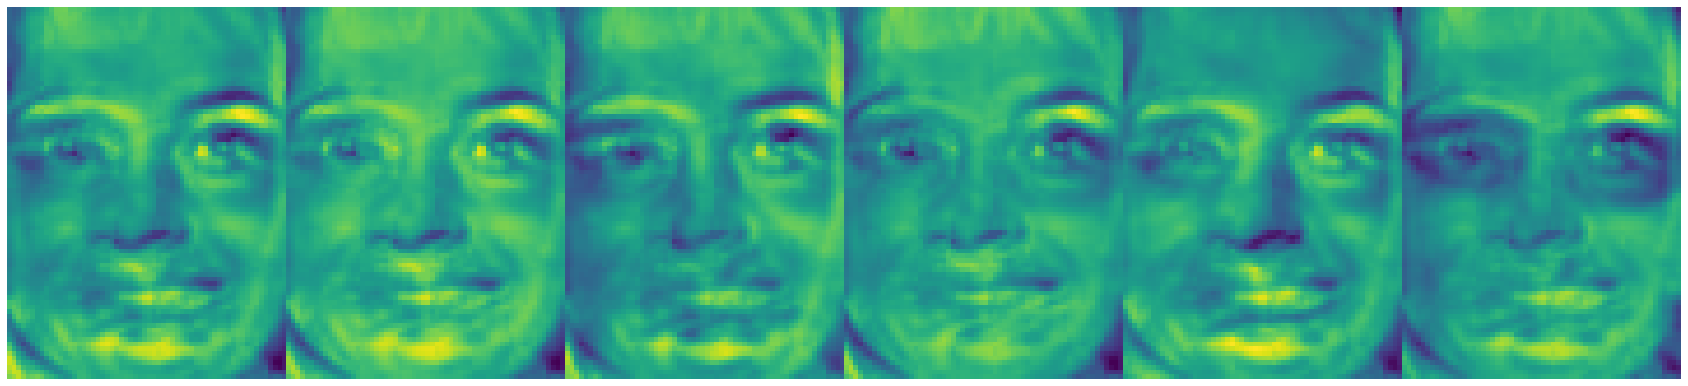

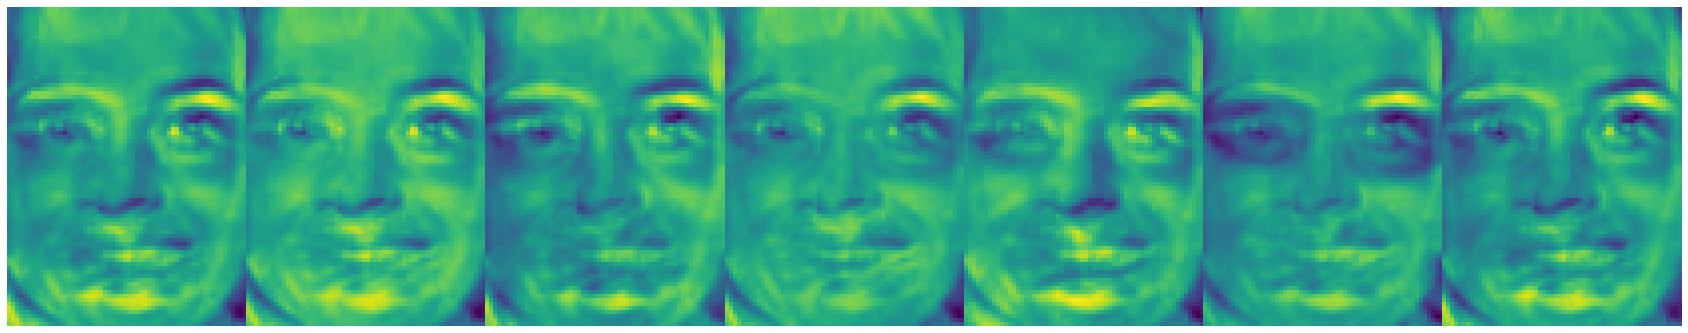

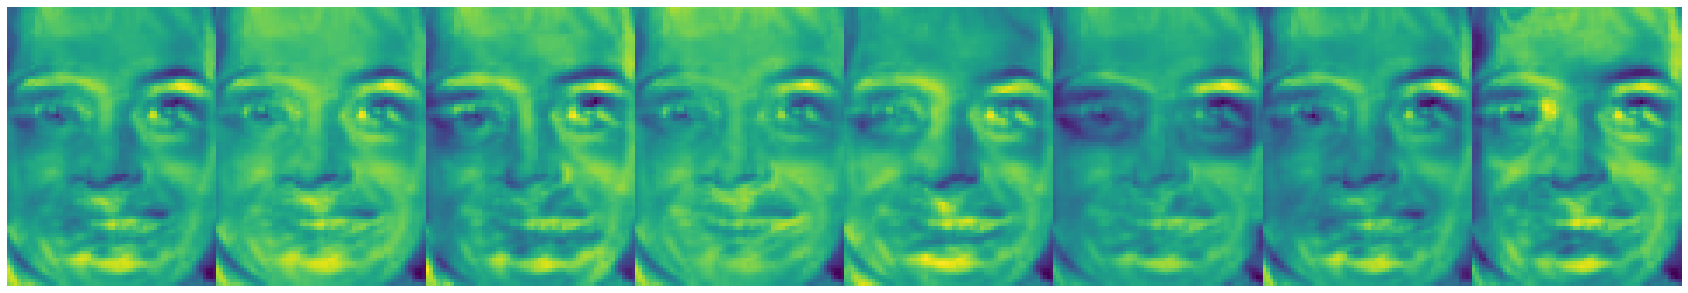

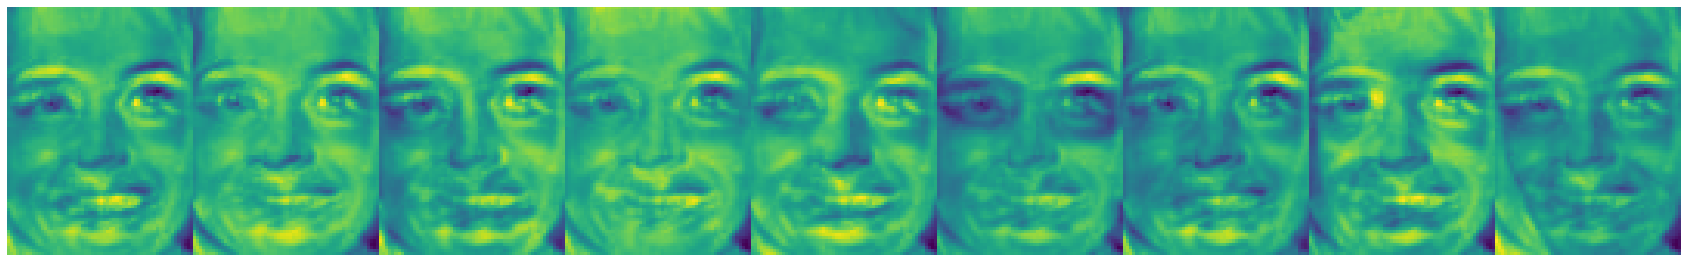

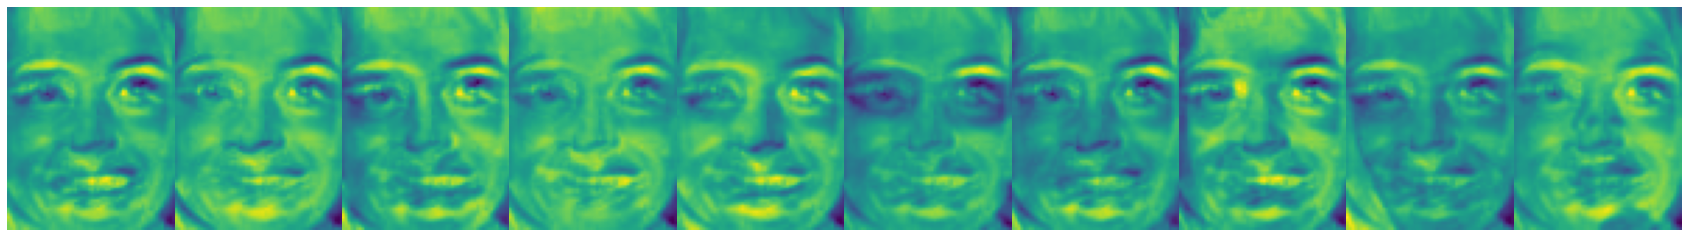

In [24]:
from random import randint

my_array = np.array(trainData)
new_array = []

for i in range(10):
    value = randint(0, len(trainData))
    new_array.append(my_array[value])
new_array = np.array(new_array)

for v in range (1 , 11):
    W , mu = eigenfaces_train(new_array , v)
    newImages = []
    for j in range(len(W)):
        output = 0
        weight = 0
        for i in range(len(W)):
            weight = np.dot(new_array[j], W[i])
            output = output + W[i].reshape(80 , 60) * weight
        newImages.append(output)
    if(len(W) < 4):
        fig = plt.figure()
    else:
        fig = plt.figure(figsize=(30, 30))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, len(W)),  # creates 5x10 grid of axes
                 axes_pad=0,  # pad between axes in inch.
                 )

    for ax, im in zip(grid, newImages):
    # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.axis('off')
    plt.show()

In [25]:
############################End of Question C

In [26]:
############################Start of Question D

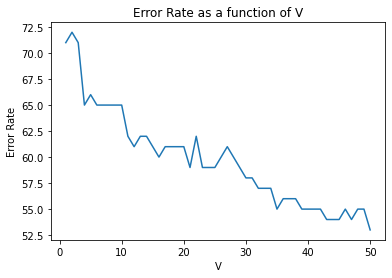

In [29]:
my_array = np.array(trainData)

testData = np.array(testDataFrame)

errorRate = []
V = []

for v in range(1, 51):
    W , mu = eigenfaces_train(my_array , v)

    testset_labels = eigenfaces_test(my_array,trainlabels,testData,W,mu,v)

    counter = 0
    for i in range(len(testset_labels)):
        if testset_labels[i] != labels[i]:
            counter = counter + 1
    errorRate.append(counter - (len(testset_labels))/len(testset_labels))
    V.append(v)
    
plt.plot(V,errorRate)
plt.title('Error Rate as a function of V')
plt.xlabel('V')
plt.ylabel('Error Rate')
plt.show()

In [28]:
def eigenfaces_test(trainData , trainlabels , testData , W , mu , v):
    trainData = trainData - mu
    newData = np.matmul(trainData , W.T)
    
    
    testData = testData - mu
    newTestData = np.matmul(testData , W.T)
    
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(newData,trainlabels)
    
    predicted= model.predict(newTestData)
    
    return predicted

In [22]:
############################End of Question D

In [23]:
############################Start of Question E

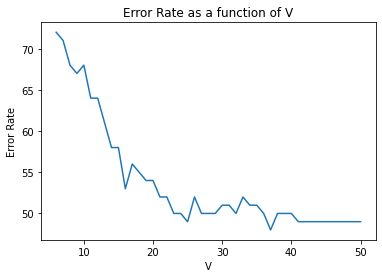

In [34]:
my_array = np.array(trainData)

testData = np.array(testDataFrame)

errorRate = []
V = []

for v in range(6, 51):
    W , mu = eigenfaces_train(my_array , v)
    
    for o in range (5):
        W = np.delete(W, 0, axis=0)

    testset_labels = eigenfaces_test(my_array,trainlabels,testData,W,mu,v)

    counter = 0
    for i in range(len(testset_labels)):
        if testset_labels[i] != labels[i]:
            counter = counter + 1
    errorRate.append(counter - (len(testset_labels))/len(testset_labels))
    V.append(v)
    
plt.plot(V,errorRate)
plt.title('Error Rate as a function of V')
plt.xlabel('V')
plt.ylabel('Error Rate')
plt.show()

In [25]:
############################End of Question E